# Aufgabe 1

a) Stellen Sie die Vandermonde-Matrix Vn zu den Werten ci = i für i = 1, . . . , n auf (evtl.
numpy.vander verwenden). Berechnen Sie die Kondition κ1(Vn ) der Vandermonde-Matrix
(beispielsweise mithilfe numpy.linalg.cond) zur 1-Norm (vgl. Beispiel 4.14 Skript).

In [1]:
import numpy as np

# Define n
n = 5

# Create the Vandermonde matrix Vn
ci = np.arange(1, n + 1)
Vn = np.vander(ci, increasing=True)

# Calculate the condition number κ1(Vn) using the 1-norm
condition_number = np.linalg.cond(Vn, p=1)

print("Vandermonde Matrix Vn:")
print(Vn)
print("\nCondition Number κ1(Vn):")
print(condition_number)

Vandermonde Matrix Vn:
[[  1   1   1   1   1]
 [  1   2   4   8  16]
 [  1   3   9  27  81]
 [  1   4  16  64 256]
 [  1   5  25 125 625]]

Condition Number κ1(Vn):
44055.0


#### Aufgabenteil b)

Berechnen Sie die Gewichte der Newton-Cotes-Quadraturformeln (vgl. Beispiel 4.15 Skript)
für verschiedene Werte von n durch Lösen des linearen Gleichungssystems, welches die
Vandermonde-Matrix beinhaltet (beispielsweise mit numpy.linalg.solve). Vergleichen Sie Ihr
Resultat mit den tatsächlichen Werten der Gewichte (diese können Sie beispielsweise mithilfe
scipy bestimmen lassen)



In [2]:


def newton_cotes(n):
    # Closure
    def calc_ci(n):
        return np.array([(i-1)/(n-1) for i in range(1, n+1)], dtype=np.float64)
    
    c_i = calc_ci(n)


    rhs_vector = np.array([1/i for i in range(1, n+1)], dtype=np.float64)
    
    Vander = np.vander(c_i, increasing=True).T
    
    b_i = np.linalg.solve(Vander, rhs_vector)

    return b_i, c_i

n = 5  # Anzahl der Knoten
b_i, c_i = newton_cotes(n)

print("b_i:", b_i)
print("c_i:", c_i)



b_i: [0.07777778 0.35555556 0.13333333 0.35555556 0.07777778]
c_i: [0.   0.25 0.5  0.75 1.  ]


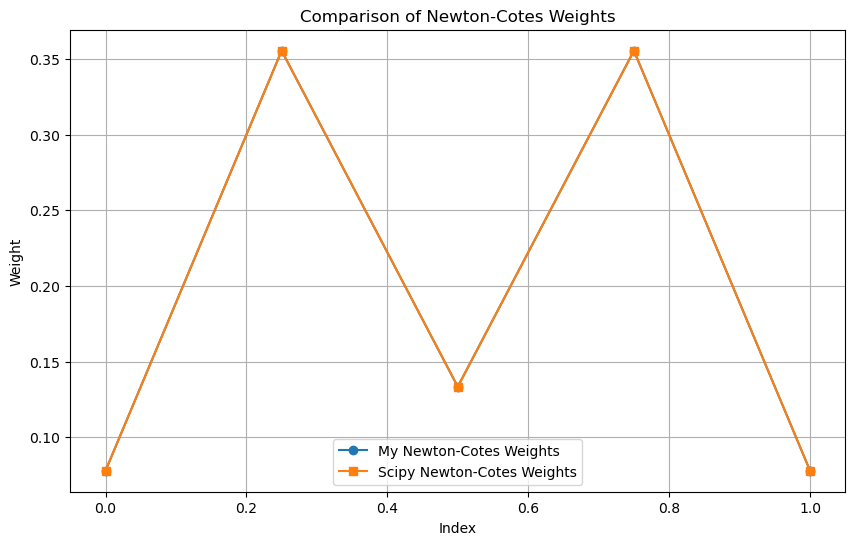

In [3]:
from scipy.integrate import newton_cotes

import matplotlib.pyplot as plt

# Calculate the scipy version of Newton-Cotes weights
b_i_scipy, error = newton_cotes(n-1)

b_i_scipy = b_i_scipy / (n-1)

# Plot the weights
plt.figure(figsize=(10, 6))
plt.plot(c_i, b_i, 'o-', label='My Newton-Cotes Weights')
plt.plot(c_i, b_i_scipy, 's-', label='Scipy Newton-Cotes Weights')
plt.xlabel('Index')
plt.ylabel('Weight')
plt.title('Comparison of Newton-Cotes Weights')
plt.legend()
plt.grid(True)
plt.show()

# Aufgabe 2)

Programmiern Sie die Cholesky Zerlegung

Consider the decomposition

$ A = L L^T = \begin{pmatrix} L_{11} & 0 & 0 \\
                            L_{21} & L_{22} & 0  \\
                            L_{31} & L_{32} & L_{33} \\
                \end{pmatrix} \begin{pmatrix} L_{11} & L_{21} & L_{31} \\
                0 & L_{22} & L_{32} \\
                0 & 0 & L_{33} \\ \end{pmatrix}$

Via Matrix Multiplikation one can obtain

$\begin{pmatrix} L_{11} & 0 & 0 \\
                            L_{21} & L_{22} & 0  \\
                            L_{31} & L_{32} & L_{33} \\
                \end{pmatrix} \begin{pmatrix} L_{11} & L_{21} & L_{31} \\
                0 & L_{22} & L_{32} \\
                0 & 0 & L_{33} \\ \end{pmatrix} = \begin{pmatrix}L_{11} & & symmetric \\
                L_{21}L_{11} & L_{21}^2 + L_{22}^2 & \\
                L_{31}L_{11}  & L_{31}L_{21} + L_{32}L_{22} & L_{31}^2 + L_{32}^2 + L_{33}^2  \\ \end{pmatrix}$



If we further write out this equation we see:

$L = \begin{pmatrix} \sqrt{A_{11}} & 0 & 0 \\
        A_{21}/L_{11} & \sqrt{A_{22}-L_{21}^2} & 0 \\
        A_{32}/L_{11} & (A_{32}-L_{31}L_{21})/L_{22} & \sqrt{A_{33}-L_{31}^2 - L_{32}^2} \\ \end{pmatrix}$

Daraus kann man sich insbesondere folgende Formeln herleiten

$L_{j,j} = (±) \sqrt{A_{j,j} - \sum_{k=1}^{j-1}L_{j,k}^2}$

und für die Off-Diagonal Elemente

$L_{ij} = \frac{1}{L_{j,j}}(A_{i,j}-\sum_{k=1}^{j-1}L_{i,k}L-{j-k})$ für $i>j$

In [4]:
def cholesky(A):
    """
    Performes the Cholesky Decomposition
    """
    n = len(A)
    L = np.zeros((n,n))

    for i in range(n): # Column 
        for k in range(i+1): #row loop
            tmp_sum = np.dot(L[i,:k],L[k,:k])
            if i == k:
                value = A[i,i] - tmp_sum
                if value <= 0:
        
                    raise np.linalg.LinAlgError("Matrix is not positive definite")
                L[i,k] = np.sqrt(A[i,i] - tmp_sum)
            else:
                L[i,k] = (A[i,k]-tmp_sum)/L[k,k]


    return L

B = np.array([[3, 1, 0, 1, -1], 
              [1, 4, 2, 0, 1], 
              [0, 2, 4, 0, 1], 
              [1, 0, 0, 2, 1], 
              [-1, 1, 1, 1, 5]])

C = np.array([[3, 0, 3, -1], 
              [0, 1, 2, 0], 
              [3, 2, 6, 0], 
              [-1, 0, 0, 2]])


D = np.array([[4, 2, -2], 
              [2, 5, 1], 
              [-2, 1, 3]])


print(cholesky(B))
#print(cholesky(C))
print(cholesky(D))

[[ 1.73205081  0.          0.          0.          0.        ]
 [ 0.57735027  1.91485422  0.          0.          0.        ]
 [ 0.          1.04446594  1.70560573  0.          0.        ]
 [ 0.57735027 -0.17407766  0.10660036  1.27475488  0.        ]
 [-0.57735027  0.69631062  0.15990054  1.12766778  1.69841555]]
[[ 2.  0.  0.]
 [ 1.  2.  0.]
 [-1.  1.  1.]]


In [5]:
L = cholesky(B)
L@L.T

array([[ 3.,  1.,  0.,  1., -1.],
       [ 1.,  4.,  2.,  0.,  1.],
       [ 0.,  2.,  4.,  0.,  1.],
       [ 1.,  0.,  0.,  2.,  1.],
       [-1.,  1.,  1.,  1.,  5.]])

# Aufgabe 3

Sei $v = [1,...1]^T \in \mathbb{R}^{60}$ und $W$ die Wilkinson Matrix der Dimension 60

+ Berechnen Sie dei $b = Wv$
+ Lösen sie in python das Gleichungsystem $Wx = b$ und bestimmen Sie die Fehler und Defekte der Numerischen Lösung
+ Verbessern Sie die numerische lösung aus B durch Nachiteraton

In [6]:
v = np.transpose(np.ones(60))

Wilk = np.zeros((60,60))

for i in range(60):
    for j in range(60):
        if i > j:
            Wilk[i,j] = -1
        elif i == j:
            Wilk[i,j] = 1
        else:
            pass
    Wilk[i,59] = 1

print(Wilk)

b = Wilk @ v

print(b)

[[ 1.  0.  0. ...  0.  0.  1.]
 [-1.  1.  0. ...  0.  0.  1.]
 [-1. -1.  1. ...  0.  0.  1.]
 ...
 [-1. -1. -1. ...  1.  0.  1.]
 [-1. -1. -1. ... -1.  1.  1.]
 [-1. -1. -1. ... -1. -1.  1.]]
[  2.   1.   0.  -1.  -2.  -3.  -4.  -5.  -6.  -7.  -8.  -9. -10. -11.
 -12. -13. -14. -15. -16. -17. -18. -19. -20. -21. -22. -23. -24. -25.
 -26. -27. -28. -29. -30. -31. -32. -33. -34. -35. -36. -37. -38. -39.
 -40. -41. -42. -43. -44. -45. -46. -47. -48. -49. -50. -51. -52. -53.
 -54. -55. -56. -58.]


In [7]:
from scipy.linalg import lu


def nachiteration(A,b):
    """ 
    Performes the Nachiteration method for matrix A and RHS-Vektor b
    """

    p,l,u = lu(A)

    # Perform Vorwärtseinsetzen

    p_b = p @ b

    c = np.linalg.solve(l,p_b)

    # Perform Rückwärtseinsetzen

    x = np.linalg.solve(u,c)

    # Calculate D
    d = b - A@x

    # Calculate delta x with LU Decomposition

    p_d = p @ d
    c = np.linalg.solve(l,p_d)

    delta_x = np.linalg.solve(u,c)

    

    x_iterated = x + delta_x

    return x_iterated , x
    

x_corrected, x = nachiteration(Wilk,b)

d_uncorrected = b - Wilk @ x

d_corrected = b - Wilk @ x_corrected

print(d_uncorrected,d_corrected)

    


[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  0. -1. -2. -3. -4. -6.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
# Define the matrix A
A = np.array([[1, 2, 0],
              [-1, 2, 0],
              [0, 0, 1]])

# Calculate the condition numbers
kappa_1 = np.linalg.cond(A, p=1)
kappa_2 = np.linalg.cond(A, p=2)
kappa_inf = np.linalg.cond(A, p=np.inf)

print("Condition number κ1:", kappa_1)
print("Condition number κ2:", kappa_2)
print("Condition number κ∞:", kappa_inf)

Condition number κ1: 4.0
Condition number κ2: 2.82842712474619
Condition number κ∞: 3.0
